<a href="https://colab.research.google.com/github/peterintest/AFINN/blob/main/AFINN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentimental Analysis with AFINN lexicon
This notebook contains the source code and visualisations for the sentimental analysis of TikTok comments for the Sentiment Analysis assignment in the 7WCM0059 - Responsible Technology module.

## Scenario 
Your team has been contracted to work on a sentiment analysis project for a social media platform company.  The project is concerned with analysing a set of user comments posted to an online public app store (reviews_pseudoanonymised.xslx), in order to measure users’ attitude towards the app.  
It has been agreed that the sentiment analysis will be conducted using the AFINN lexicon.

**Reference**

Finn Årup Nielsen, “A new ANEW: evaluation of a word list for sentiment analysis in microblogs”, Proceedings of the ESWC2011 Workshop on ‘Making Sense of Microposts’: Big things come in small packages. Volume 718 in CEUR Workshop Proceedings: 93-98. 2011 May. Matthew Rowe, Milan Stankovic, Aba-Sah Dadzie, Mariann Hardey

## Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
from wordcloud import WordCloud
from string import punctuation
from google.colab import drive


## Mount Google Drive

In [3]:
drive.mount('/content/drive')

AFINN_PATH = '/content/drive/MyDrive/sentimental_analysis/AFINN/AFINN-111.txt'
REVIEWS_PATH = '/content/drive/MyDrive/sentimental_analysis/reviews_pseudoanonymised.xlsx'

Mounted at /content/drive


## Initialise AFINN 
Read the AFINN dictionary into memory

In [4]:
AFINN = dict()
with open(AFINN_PATH) as f:
    for line in f:
        (k, v) = line.split('\t')
        AFINN[k] = int(v)

## Using AFINN

In [5]:
# Helper functions

def clean_text(text):
    ''' Remove non-ascii characters, punctuation and lowercase the text '''
    return ''.join([c.lower()
                    for c in text
                    if c not in punctuation and ord(c) < 128
                    ])


def score_word(word):
    '''Look-up word/phrase in AFINN dictionary and return score or zero'''
    return AFINN.get(word.strip(), 0)

In [6]:
# load reviews xlsx into dataframe
df = pd.read_excel(REVIEWS_PATH, sheet_name='reviews', usecols=['date', 'helpful', 'comment'])
df['date']= pd.to_datetime(df['date'])
# sort dataframe by date
df = df.sort_values(by=['date'])

# calculate scores
scores = []
sentiments = []
for ind in df.index: 
    # make text lower case and remove punctuation
    words = clean_text(df['comment'][ind]).split()

    # obtain score for each word
    score = 0
    for word in words:
        score += score_word(word)
        # determine sentiment
    if score > 0:
        sentiment = 'positive'
    elif score < 0:
        sentiment = 'negative'
    elif score == 0:
        sentiment = 'neutral'
    scores.append(score)
    sentiments.append(sentiment)

# add scores and setiment to dataframe
df['score'] = scores
df['sentiment'] = sentiments


In [ ]:
unique_words = {word
               for comment in df['comment'].to_list()
               for word in clean_text(comment).split()}

word_scores = {word : score_word(word)
               for tweet in unique_words
               for word in clean_text(tweet).split()}
word_scores

dict(sorted(word_scores.items(), key=lambda item: item[1], reverse=True))

# Analysis

Text(0, 0.5, 'count')

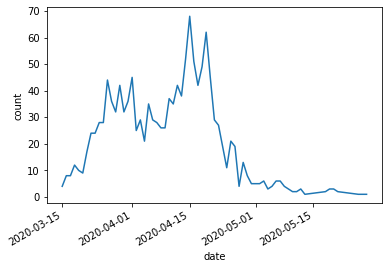

In [15]:
ax = df.groupby('date').date.count().plot()
ax.set_xlabel("date")
ax.set_ylabel("count")

Text(0, 0.5, 'count')

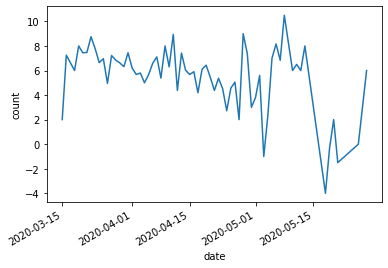

In [8]:
ax = df.groupby('date').score.mean().plot()
ax.set_xlabel("date")
ax.set_ylabel("count")

Text(0, 0.5, 'count')

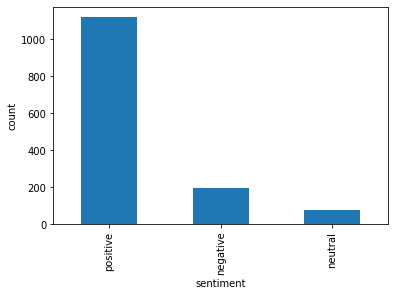

In [9]:
ax = df['sentiment'].value_counts().plot.bar()
ax.set_xlabel("sentiment")
ax.set_ylabel("count")

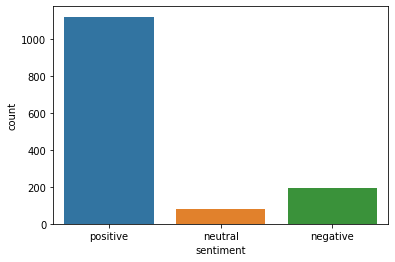

In [10]:
sns.countplot(x="sentiment", data=df)

In [11]:
positive_words = Counter([word
                          for comment in df['comment'].to_list()
                          for word in clean_text(comment).split()
                          if score_word(word) > 0
                          ])
positive_words.most_common(10)

[('like', 619),
 ('love', 494),
 ('good', 334),
 ('fun', 309),
 ('please', 278),
 ('great', 223),
 ('amazing', 185),
 ('want', 179),
 ('best', 129),
 ('help', 106)]

In [12]:
negative_words = Counter([word
                          for comment in df['comment'].to_list()
                          for word in clean_text(comment).split()
                          if score_word(word) < 0
                          ])
negative_words.most_common(10)

[('problem', 316),
 ('no', 253),
 ('annoying', 71),
 ('bad', 71),
 ('problems', 58),
 ('wrong', 41),
 ('hard', 40),
 ('bored', 32),
 ('hate', 26),
 ('stop', 26)]

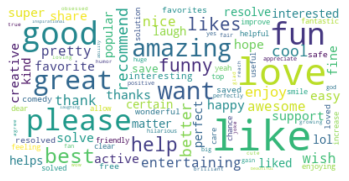

In [13]:
wc = WordCloud(max_font_size=50, max_words=100, background_color="white")
wc.generate_from_frequencies(positive_words)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

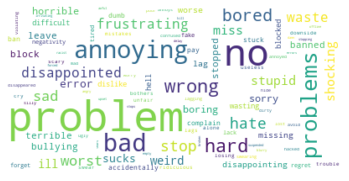

In [14]:
wc = WordCloud(max_font_size=50, max_words=100, background_color="white")
wc.generate_from_frequencies(negative_words)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()